# Recommendation System for Hoboken Reviews(yelp)
### - Methodlogy: Basic method(3)+ Machine learning methods(5)
### - Objective: providing 3 more restaurants for each customers based on historical data.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import pandas as pd
from sklearn.model_selection import train_test_split
import graphlab

## I. Data EDA and Preparation

In [2]:
df=pd.read_csv('Hoboken_restaurants_reviews.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
0,0,0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5.0 star rating,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
1,1,1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4.0 star rating,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
2,2,2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5.0 star rating,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
3,3,3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4.0 star rating,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
4,4,4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5.0 star rating,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"


In [3]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

In [4]:
df.head()

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5.0 star rating,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4.0 star rating,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5.0 star rating,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4.0 star rating,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5.0 star rating,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74611 entries, 0 to 74610
Data columns (total 8 columns):
user_id              74611 non-null object
user_name            74611 non-null object
user_rating          74611 non-null object
user_text            74611 non-null object
restaurant_name      74611 non-null object
restaurant_rating    74611 non-null object
restaurant_price     74479 non-null object
restaurant_type      74611 non-null object
dtypes: object(8)
memory usage: 4.6+ MB


In [6]:
df.describe()

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
count,74611,74611,74611,74611,74611,74611,74479,74611
unique,44949,24781,5,69542,302,7,4,230
top,QxTNaHoxTL8f7jAK5nwQ1g,Nicholas G.,5.0 star rating,Nice Place to go with friends. Amazing food.,Morimoto,4.0 star rating,$$,"Japanese,, Sushi, Bars"
freq,101,103,27702,3,2740,31568,38323,3620


In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().any()

user_id              False
user_name            False
user_rating          False
user_text            False
restaurant_name      False
restaurant_rating    False
restaurant_price      True
restaurant_type      False
dtype: bool

In [9]:
df[df.restaurant_price.isnull() == True]

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
5273,i_WxJpoxfsddmBne6I8cKQ,Durva L.,4.0 star rating,"This is such a small place, but some great rea...",Funjabi,2.5 star rating,NaN,"Indian,, Chinese"
5274,zr0jkmEJLnaZxWZi7cp09Q,Wasbir R.,1.0 star rating,Giving 1 star because theres no 0 star. This i...,Funjabi,2.5 star rating,NaN,"Indian,, Chinese"
6782,cnNddUd4fn7h-Pb_Cma-9Q,mako y.,5.0 star rating,Wonderful!!! It was traditional with unique tw...,奥田,4.5 star rating,NaN,Japanese
6783,q1P19WvpTXFTmfU7oXgkag,Chester G.,2.0 star rating,When I heard Chef Toru Okuda was going to open...,奥田,4.5 star rating,NaN,Japanese
6784,hIrk8azL929_c4H4-3lEAg,Christie K.,5.0 star rating,Soooo good. A must try if you can appreciate g...,奥田,4.5 star rating,NaN,Japanese
6785,NSmWDNSyjqhm1vo7VUxL5w,Jay C.,5.0 star rating,It is with mixed emotion I write what follows....,奥田,4.5 star rating,NaN,Japanese
6786,xM30Cj7zdsTiRQ-zmAFNjw,Victor O.,5.0 star rating,It was memorable experience. It was hard to ma...,奥田,4.5 star rating,NaN,Japanese
6787,fbv2hE02tCljub9JcDSiDw,Cinesina C.,5.0 star rating,I travel a lot to Japan for work so when I rea...,奥田,4.5 star rating,NaN,Japanese
9348,7CvAUqZqqZBKvkgwI0kfzw,Steven P.,5.0 star rating,"Sad to hear they closed in The Heights, then t...",Mision Burrito,2.5 star rating,NaN,"Mexican,, Grocery,, Convenience, Stores"
9349,-jNxEJzXNWtbCy5VEyS3Lw,Mark A.,5.0 star rating,What a awesome place!! It's located on the cor...,Mision Burrito,2.5 star rating,NaN,"Mexican,, Grocery,, Convenience, Stores"


Only some price value is missing since these value is not exist on the Yelp. So I will just remain them as NA.

#### data definition:
- user_id: Unique id for each customer
- user_name: customer's name
- user_raing: original rating for one restaurant per time
- user_text: customer's review for one restaurant per time
- restaurant_name: unique name for each restaurant
- restaurant_price: degree of cheap or expensive of one restaurant
- restaurant_type: the style and theme of one restaurant

### data processing one by one

#### user_id

In [10]:
user_id = pd.DataFrame(df.user_id.value_counts().head(10))
user_id.reset_index(level=0, inplace = True)
user_id.columns = ['user_id', 'count']
user_id

,user_id,count
0,QxTNaHoxTL8f7jAK5nwQ1g,101
1,5aZX8bTiD0k9vR60SG588Q,76
2,GRY2acZtI5q4P1KdCWhcUQ,66
3,LcWOq7p7Mhtv9hIlDrhy9A,62
4,Y59HQNazSLR1EUMUmMOaFg,61
5,NWLqOKl0Vxi7qK-6EoBLbg,60
6,A5dqSwriUs8cV4DEzS_V9A,59
7,svFycHjXZYpNVutZ_0_gDQ,59
8,dl4ENy4Bk6-lCu59A8vxbg,57
9,94V-snVUg2Gd-OPd7rcZEg,54


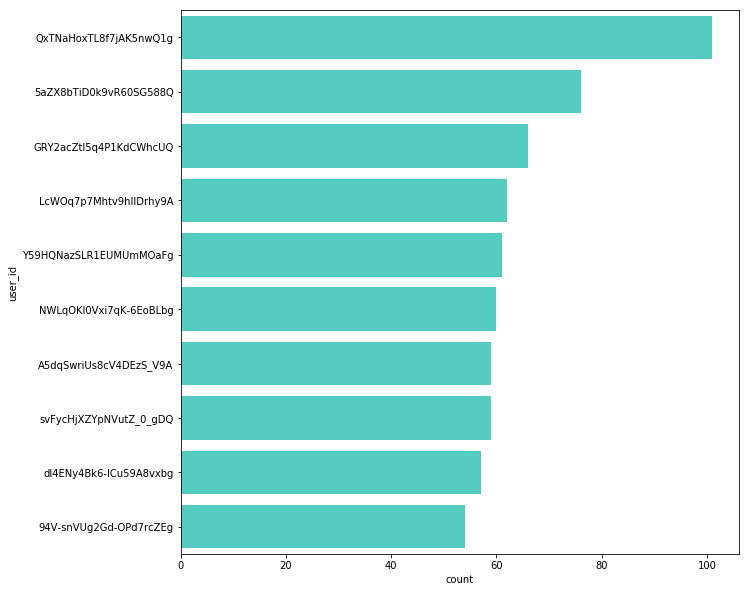

In [11]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='count', y='user_id', data=user_id, color="turquoise", ax = ax)
plt.show()

Multiple customers leave reviews for restaurants more than one times. It is valuable for the recommendation system.

#### user_name

In [12]:
user_name = pd.DataFrame(df.user_name.value_counts().head(10))
user_name.reset_index(level=0, inplace = True)
user_name.columns = ['user_name', 'count']
user_name

,user_name,count
0,Nicholas G.,103
1,David S.,91
2,David C.,87
3,John M.,80
4,Jessica W.,79
5,Alison C.,78
6,Melissa M.,77
7,Dave F.,73
8,Alex C.,71
9,Nicole S.,70


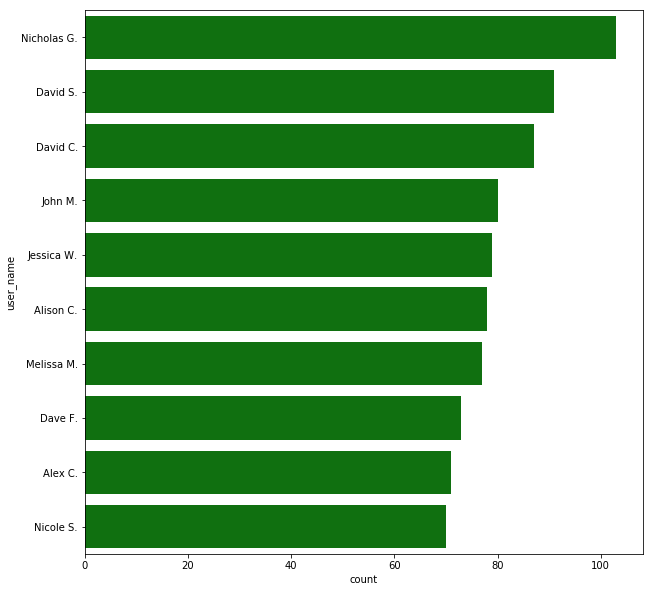

In [13]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='count', y='user_name', data=user_name, color="green", ax = ax)
plt.show()

In [14]:
user_name = pd.DataFrame(df.user_name.value_counts().tail(10))
user_name.reset_index(level=0, inplace = True)
user_name.columns = ['user_name', 'count']
user_name

,user_name,count
0,Kiki H.,1
1,Arron H.,1
2,Donna Y.,1
3,Nicholas Y.,1
4,Kayser W.,1
5,Ethan S.,1
6,Winnie C.,1
7,Donny K.,1
8,Yelp E.,1
9,Lukasz K.,1


Since different customers might have same name, in order to invoid error, I will not use user_id in the recommendation system.

### user_rating

In [15]:
df.user_rating.unique()

array(['5.0 star rating', '4.0 star rating', '3.0 star rating',
       '1.0 star rating', '2.0 star rating'], dtype=object)

I would like to convert the string into integer format.

In [16]:
df.user_rating = df.user_rating.replace({'5.0 star rating':5,
                                         '4.0 star rating':4, 
                                         '3.0 star rating':3,
                                         '2.0 star rating':2,
                                         '1.0 star rating':1
                                        })

In [17]:
rating = pd.DataFrame(df.user_rating.value_counts().head())
rating.reset_index(level=0, inplace = True)
rating.columns=['rating', 'count']
rating

,rating,count
0,5,27702
1,4,23140
2,3,10916
3,1,6608
4,2,6245


/Users/mani/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


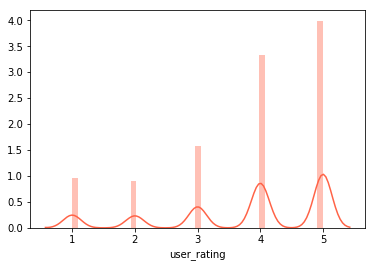

In [18]:
sns.distplot(df.user_rating, color = 'tomato')
plt.show()

- restaurant name

In [19]:
len(df.restaurant_name.unique())

302

In [20]:
restaurant_name = df.groupby(df['restaurant_name']).user_id.count()
restaurant_name = pd.DataFrame(restaurant_name)
restaurant_name = restaurant_name.reset_index()
restaurant_name = restaurant_name.rename(index=str, columns={"user_id": "count"})

In [21]:
top_10 = restaurant_name.sort_values(by=['count'], ascending=False).head(10)

In [22]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='count', y='restaurant_name', data=top_10, color="violet", ax = ax)
plt.show()

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 720x720 with 1 Axes>

In [23]:
restaurant_name.sort_values(by=['count']).head(10)

,restaurant_name,count
165,Manhattan Bar Grill & Lounge,1
18,Azteca Taqueria Restaurant,1
159,MONDO - DOGS,1
81,El Cantante,1
289,Wah Yoan,1
92,Field House Grill,1
1,52 Restaurant,1
87,El Salvador Restaurant,1
240,Taquitos Mexicanos,2
99,Funjabi,2


- restaurant_rating

In [24]:
df.restaurant_rating = df.restaurant_rating.replace({'5.0 star rating':5,
                                         '4.0 star rating':4, 
                                         '3.0 star rating':3,
                                         '2.0 star rating':2,
                                         '1.0 star rating':1
                                        })

- restaurant_price

In [25]:
df.restaurant_price.unique()

array(['$$', '$', '$$$', nan, '$$$$'], dtype=object)

In [26]:
df.restaurant_price = df.restaurant_price.replace({'$':1,
                                                     '$$':2, 
                                                     '$$$':3,
                                                     '$$$$':4})

- restaurant_type

In [27]:
li = []
for i in range(len(df)):
    item = df.restaurant_type.loc[i].replace(',', '')
    item = item.replace('&', '')
    li.append(item)

In [28]:
df['restaurant_type'] = li

- data cleaning finish

In [29]:
df.to_csv('Hoboken_restaurants_reviews_cleaned.csv', index=False)

## Reshape Dataset

In [30]:
df = pd.read_csv('Hoboken_restaurants_reviews_cleaned.csv')

train_raw = df[['user_id','restaurant_name', 'user_rating']]

In [31]:
len(train_raw.user_id.unique())

44949

In [32]:
gb_df = pd.DataFrame(train_raw.groupby(['restaurant_name','user_id']).mean())
gb_df.reset_index(level=0, inplace = True)
gb_df.reset_index(level=0, inplace = True)
gb_df.to_csv('rating_only_dataset.csv', index=False)

In [33]:
train_df = gb_df.pivot(index = 'user_id', columns ='restaurant_name', values = 'user_rating').fillna(0)
train_df.to_csv('recommendation_dataset.csv',index=True)

In [34]:
train_set = pd.read_csv('recommendation_dataset.csv')

In [35]:
train_set.head()

,user_id,10th & Willow Bar & Grill,52 Restaurant,8th Street Tavern,Adoro Lei,Aether Game Cafe,Ahri’s Kitchen,Ainsworth Hoboken,Aldys Restaurant,Ali Baba,...,White Star Bar,Wicked Wolf Tavern,Willie McBrides,Yeung II Sushi Asian Cuisine,Zack’s Oak Bar & Restaurant,Zafra Kitchen,Zap’s,bwè kafe,honeygrow,奥田
0,---xAZNw9fFPBoy7jmkA2A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,--68ZwhCrUJUmCXXkMTMKw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,--8M2DZ9JkDwTveuRhLPTQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,--ARr3m5JsxaX3DTUVQW7w,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,--CZJeSIpxwQ0VULjnM57w,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## III. Basic Methods:
- co-occurrence matrices
- collaborative filtering
- matrix decomposition

### III.1 co-occurrence Matrices

- Background:
This is the simpliest method I use to build the recommendation system.   
The underlying assumption is that the customers will be interested in the restaurants that the other customers who attended same restaurants with this customer have been.

- Algorithms/equations:  
    - Co-occurrence Matrix = T(A) * A  
    - recommender = Co-occurrence Matrix * u

- Advantages:
    - Simple
    - Build with dataset in any size

- Limitations:
    - only based on the past behavior
    - ignore the user's rating for restaurants

In [36]:
import pandas as pd
import numpy as np

- Step 1: data preparation

In [37]:
def get_dataset_co_occurence(df):
    df = df.replace({5:1, 4:1, 3:1, 2:1})
    return df

- Step 2: co-occurrence matrix

In [38]:
def get_co_occurrence_matrices(df):
    co_train_set = get_dataset_co_occurence(df)
    co_matrices =np.matrix(co_train_set.iloc[:,1:])
    co_matrices_t = co_matrices.getT()
    co_matrices_t
    co_occurence_matrix = co_matrices_t * co_matrices
    np.fill_diagonal(co_occurence_matrix, 0)
    return co_train_set,co_occurence_matrix

- Step 3: recommender for each user

In [39]:
def get_co_occurence_result(df=None, user_idx=None, user_id = None, top_n=None):
    if user_idx is not None:
        user = co_train_set.iloc[user_idx,1:]
    if user_id is not None:
        user = co_train_set[co_train_set.user_id== user_id].iloc[0][1:]
    user_vector = np.array(user)
    recommender =  user_vector * co_occurence_matrix
    recommender = np.array(recommender).reshape(-1,)
    recommender = recommender.tolist()
    user_result = pd.DataFrame(user)
    user_result['recommender'] = recommender
    result_for_user = user_result[user_result.iloc[:, 0] != 1].sort_values(by = 'recommender', ascending = False)
    result_for_user = list(result_for_user.head(top_n).index.values)
    return result_for_user

In [40]:
co_train_set,co_occurence_matrix = get_co_occurrence_matrices(train_set)
recommendation_for_user  = get_co_occurence_result(df = co_train_set, user_id= '--68ZwhCrUJUmCXXkMTMKw', top_n = 3)
recommendation_for_user

['The Cheesecake Factory', 'Raaz', 'New Thanh Hoai']

### III.2 Collaborative Filtering
- Background: My second recommendation system use collaborative filtering. This method is tring to find people with similar interests, analyze those guys behaviors, and recommend user the same items. These are two basic approaches in Collaborative Filtering: user-based collaborative filtering and item-based collaborative filtering.
  
- Basically, all of those two methods contains two steps:
    - First Step: Find out how many users/items in the database are similar to the given user/item.  
    - Second Step: Assess other users/items to predict what grade you would give the user of this product, given the total weight of the users/items that are more similar to this one.
    

- Algorithms/Equations:
    - Similarity Calculation: 
        1. cosine similarity; 
        2. Jaccard Similarity; 
        3. Pearson Similarity
    - Recommend_items: simple **weighted arithmetic mean** according to the degree of similarity to fill empty cells in the table.
    
      
- Advantages:
    - Take the rating into account  
    
  
- Disadvantages:
    - Only focus on the privious behaviors

- Step 1: Data preparationg

In [41]:
df = pd.read_csv('rating_only_dataset.csv')

In [42]:
n_users = df.user_id.unique().shape[0]
n_items = df.restaurant_name.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of restaurants = ' + str(n_items))

Number of users = 44949 | Number of restaurants = 302


In [43]:
train_data, test_data = train_test_split(df, test_size=0.25)

In [44]:
train_data.head()

,user_id,restaurant_name,user_rating
51793,LwW8U8W5A9HKr3gTXILEqA,The Brass Rail,4
10001,lXVG3N6C01AQwoblXXl4BA,Casa La Femme,1
62775,LNozAFneK7NN_KLLckvudQ,Trattoria Saporito,3
21528,iJBL9x2uv5_Je3n_2mCQlA,Entwine,3
66251,Sy3vb_N2Us-bWqdyhPP2ZQ,Wafels & Dinges,5


In [45]:
train_data.shape

(52163, 3)

In [46]:
test_data.head()

,user_id,restaurant_name,user_rating
20166,13oT_jlpmT3DMyMBDvSNoA,Employees Only,4
16647,givAxTBH5CBj0czr26urhQ,Del Posto,5
13068,zCHFBWjQlp9QutNDIGNgjg,Chart House,5
50917,HRNbf4hTkE67sJeK1DU7OA,Takashi,5
47504,SbyKtR2MnSOi1nX2aI2mKA,San Marino Restaurante,3


In [47]:
test_data.shape

(17388, 3)

- Step 2: calculate similarity 
    - Three Similarity
        1. cosine similarity; 
        2. Jaccard Similarity; 
        3. Pearson Similarity
    - Two approches
        1. user-item collaborative filtering
        2. item-item collaborative filtering

In [48]:
train_data_gl = graphlab.SFrame(train_data)
test_data_gl = graphlab.SFrame(test_data)

This non-commercial license of GraphLab Create for academic use is assigned to nman@stevens.edu and will expire on April 25, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1524687797.log


In [49]:
train_data_gl.head(5)

user_id,restaurant_name,user_rating
LwW8U8W5A9HKr3gTXILEqA,The Brass Rail,4
lXVG3N6C01AQwoblXXl4BA,Casa La Femme,1
LNozAFneK7NN_KLLckvudQ,Trattoria Saporito,3
iJBL9x2uv5_Je3n_2mCQlA,Entwine,3
Sy3vb_N2Us-bWqdyhPP2ZQ,Wafels & Dinges,5


In [50]:
test_data_gl.head(5)

user_id,restaurant_name,user_rating
13oT_jlpmT3DMyMBDvSNoA,Employees Only,4
givAxTBH5CBj0czr26urhQ,Del Posto,5
zCHFBWjQlp9QutNDIGNgjg,Chart House,5
HRNbf4hTkE67sJeK1DU7OA,Takashi,5
SbyKtR2MnSOi1nX2aI2mKA,San Marino Restaurante,3


- try popularity_recommender
    - Arg:
        - train_data: the SFrame which contains the required data
        - user_id: the column name which represents each user ID
        - item_id: the column name which represents each item to be recommended
        - target: the column name representing scores/ratings given by the user

In [51]:
popularity_model = graphlab.popularity_recommender.create(train_data_gl, 
                                                          user_id='user_id', 
                                                          item_id='restaurant_name', 
                                                          target='user_rating')

Recsys training: model = popularity

Preparing data set.

Data has 52163 observations with 35756 users and 298 items.

Data prepared in: 0.166531s

52163 observations to process; with 298 unique items.

In [52]:
popularity_recomm = popularity_model.recommend(users=range(1,6),k=3)

In [53]:
popularity_recomm.print_rows(num_rows=28)

+---------+------------------------------+-------+------+
| user_id |       restaurant_name        | score | rank |
+---------+------------------------------+-------+------+
|    1    |       Gold Roast Cafe        |  5.0  |  1   |
|    1    | Manhattan Bar Grill & Lounge |  5.0  |  2   |
|    1    |        Terranova Deli        |  5.0  |  3   |
|    2    |       Gold Roast Cafe        |  5.0  |  1   |
|    2    | Manhattan Bar Grill & Lounge |  5.0  |  2   |
|    2    |        Terranova Deli        |  5.0  |  3   |
|    3    |       Gold Roast Cafe        |  5.0  |  1   |
|    3    | Manhattan Bar Grill & Lounge |  5.0  |  2   |
|    3    |        Terranova Deli        |  5.0  |  3   |
|    4    |       Gold Roast Cafe        |  5.0  |  1   |
|    4    | Manhattan Bar Grill & Lounge |  5.0  |  2   |
|    4    |        Terranova Deli        |  5.0  |  3   |
|    5    |       Gold Roast Cafe        |  5.0  |  1   |
|    5    | Manhattan Bar Grill & Lounge |  5.0  |  2   |
|    5    |   

#### All the results are same. 

In [54]:
train_data.groupby(by='restaurant_name')['user_rating'].mean().sort_values(ascending=False).head(20)

restaurant_name
MONDO - DOGS                       5.000000
Ventura Restaurant                 5.000000
Gold Roast Cafe                    5.000000
Azteca Taqueria Restaurant         5.000000
Manà Restaurant                    5.000000
Ujala Kabab                        5.000000
Manhattan Bar Grill & Lounge       5.000000
Taquitos Mexicanos                 5.000000
Terranova Deli                     5.000000
52 Restaurant                      5.000000
Griot Cafe                         5.000000
Andrea Salumeria                   4.870748
Toscana                            4.866667
Taste of Greece                    4.857143
Royal Grill Halal Food             4.803738
Rizzo Bakery                       4.704918
M & P Biancamano                   4.676471
Losurdo’s Italian Bakery & Deli    4.666667
Salerno Salumeria                  4.666667
The Heights Café                   4.666667
Name: user_rating, dtype: float64

#### Since all the recommended restaurant have an average rating of 5. So the popularity recommender is not accurate enough. So I will come back to collaborative filtering.

##### Cosine similarity

In [56]:
Cosine_model = graphlab.item_similarity_recommender.create(train_data_gl, user_id='user_id', 
                                                             item_id='restaurant_name', 
                                                             target='user_rating', 
                                                             similarity_type='cosine')

Recsys training: model = item_similarity

Preparing data set.

Data has 52163 observations with 35756 users and 298 items.

Data prepared in: 0.175455s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 787us                          | 13.75      |

| 17.099ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 19.865ms                            | 0                | 0               |

| 42.891ms                            | 100              | 298             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.055826s

##### Jaccard Similarity

In [57]:
Jaccard_model = graphlab.item_similarity_recommender.create(train_data_gl, user_id='user_id', 
                                                             item_id='restaurant_name', 
                                                             target='user_rating', 
                                                             similarity_type='jaccard')

Recsys training: model = item_similarity

Preparing data set.

Data has 52163 observations with 35756 users and 298 items.

Data prepared in: 0.206472s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.883ms                        | 16.75      |

| 29.528ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 31.729ms                            | 0                | 0               |

| 59.386ms                            | 100              | 298             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.072818s

##### Pearson Similarity

In [58]:
Pearson_model = graphlab.item_similarity_recommender.create(train_data_gl, user_id='user_id', 
                                                             item_id='restaurant_name', 
                                                             target='user_rating', 
                                                             similarity_type='pearson')

Recsys training: model = item_similarity

Preparing data set.

Data has 52163 observations with 35756 users and 298 items.

Data prepared in: 0.171465s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 5.86ms                         | 2.75       |

| 23.085ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 24.83ms                             | 0                | 0               |

| 55.36ms                             | 100              | 298             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.067496s

- Step 3: Predict the rating and recommend top 3 rating restaurants

In [75]:
Cosine_recommendation = Cosine_model.recommend(k=3,verbose=False)
Cosine_recommendation.print_rows(num_rows=30)

+------------------------+----------------------------+-----------------+------+
|        user_id         |      restaurant_name       |      score      | rank |
+------------------------+----------------------------+-----------------+------+
| LwW8U8W5A9HKr3gTXILEqA |          Onieals           |  0.377280950546 |  1   |
| LwW8U8W5A9HKr3gTXILEqA |       Cooper’s Union       |  0.338044643402 |  2   |
| LwW8U8W5A9HKr3gTXILEqA |    Amanda’s Restaurant     |  0.313898324966 |  3   |
| lXVG3N6C01AQwoblXXl4BA |          Entwine           | 0.0210870504379 |  1   |
| lXVG3N6C01AQwoblXXl4BA |         Left Bank          | 0.0205468535423 |  2   |
| lXVG3N6C01AQwoblXXl4BA |        Ed & Mary’s         | 0.0186982750893 |  3   |
| LNozAFneK7NN_KLLckvudQ |       Cafe Michelina       | 0.0845682382584 |  1   |
| LNozAFneK7NN_KLLckvudQ |          The Park          | 0.0810015082359 |  2   |
| LNozAFneK7NN_KLLckvudQ |          Robongi           | 0.0746501326561 |  3   |
| iJBL9x2uv5_Je3n_2mCQlA |  

In [76]:
Jaccard_recommendation = Jaccard_model.recommend(k=3,verbose=False)
Jaccard_recommendation.print_rows(num_rows=30)

+------------------------+-----------------------------+------------------+------+
|        user_id         |       restaurant_name       |      score       | rank |
+------------------------+-----------------------------+------------------+------+
| LwW8U8W5A9HKr3gTXILEqA |           Onieals           | 0.0544662475586  |  1   |
| LwW8U8W5A9HKr3gTXILEqA | Zack’s Oak Bar & Restaurant | 0.0451613068581  |  2   |
| LwW8U8W5A9HKr3gTXILEqA |  10th & Willow Bar & Grill  | 0.0428894162178  |  3   |
| lXVG3N6C01AQwoblXXl4BA |          Left Bank          | 0.0100806355476  |  1   |
| lXVG3N6C01AQwoblXXl4BA |           Entwine           | 0.00925928354263 |  2   |
| lXVG3N6C01AQwoblXXl4BA |    EN Japanese Brasserie    | 0.0087873339653  |  3   |
| LNozAFneK7NN_KLLckvudQ |        Cafe Michelina       | 0.0175560116768  |  1   |
| LNozAFneK7NN_KLLckvudQ |  Mikie Squared Bar & Grill  | 0.0140484452248  |  2   |
| LNozAFneK7NN_KLLckvudQ |           Robongi           |  0.012177324295  |  3   |
| iJ

In [77]:
Pearson_recommendation = Pearson_model.recommend(k=3,verbose=False)
Pearson_recommendation.print_rows(num_rows=30)

+------------------------+------------------------------+-------+------+
|        user_id         |       restaurant_name        | score | rank |
+------------------------+------------------------------+-------+------+
| LwW8U8W5A9HKr3gTXILEqA |       Gold Roast Cafe        |  5.0  |  1   |
| LwW8U8W5A9HKr3gTXILEqA | Manhattan Bar Grill & Lounge |  5.0  |  2   |
| LwW8U8W5A9HKr3gTXILEqA |        Terranova Deli        |  5.0  |  3   |
| lXVG3N6C01AQwoblXXl4BA |       Gold Roast Cafe        |  5.0  |  1   |
| lXVG3N6C01AQwoblXXl4BA | Manhattan Bar Grill & Lounge |  5.0  |  2   |
| lXVG3N6C01AQwoblXXl4BA |        Terranova Deli        |  5.0  |  3   |
| LNozAFneK7NN_KLLckvudQ |       Gold Roast Cafe        |  5.0  |  1   |
| LNozAFneK7NN_KLLckvudQ | Manhattan Bar Grill & Lounge |  5.0  |  2   |
| LNozAFneK7NN_KLLckvudQ |        Terranova Deli        |  5.0  |  3   |
| iJBL9x2uv5_Je3n_2mCQlA |       Gold Roast Cafe        |  5.0  |  1   |
| iJBL9x2uv5_Je3n_2mCQlA | Manhattan Bar Grill & Lo

- Step 4: Accuracy Evaluation
Recall:What ratio of items that a user likes were actually recommended.

Precision:Out of all the recommended items, how many the user actually liked?


In [83]:
model_performance = graphlab.compare(test_data_gl, [popularity_model, Cosine_model, Jaccard_model, Pearson_model])

PROGRESS: Evaluate model M0


recommendations finished on 1000/14140 queries. users per second: 36521.7

recommendations finished on 2000/14140 queries. users per second: 42215.5

recommendations finished on 3000/14140 queries. users per second: 44904.8

recommendations finished on 4000/14140 queries. users per second: 44189.6

recommendations finished on 5000/14140 queries. users per second: 39835.2

recommendations finished on 6000/14140 queries. users per second: 41343.4

recommendations finished on 7000/14140 queries. users per second: 43004.7

recommendations finished on 8000/14140 queries. users per second: 44357.7

recommendations finished on 9000/14140 queries. users per second: 44369.9

recommendations finished on 10000/14140 queries. users per second: 46212.4

recommendations finished on 11000/14140 queries. users per second: 36993.7

recommendations finished on 12000/14140 queries. users per second: 34495

recommendations finished on 13000/14140 queries. users per second: 32093.1

recommendations finished on 14000/14140 queries. users per second: 30588.4


Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |        0.0        |        0.0        |
|   2    |        0.0        |        0.0        |
|   3    |        0.0        |        0.0        |
|   4    |  3.5360678925e-05 |  0.0001414427157  |
|   5    |  4.243281471e-05  |  0.00016501650165 |
|   6    |  3.5360678925e-05 |  0.00016501650165 |
|   7    | 8.08244089715e-05 | 0.000518623290901 |
|   8    | 8.84016973126e-05 | 0.000660066006601 |
|   9    | 9.42951438001e-05 | 0.000719000471476 |
|   10   | 8.48656294201e-05 | 0.000719000471476 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/14140 queries. users per second: 29266.3

recommendations finished on 2000/14140 queries. users per second: 29289

recommendations finished on 3000/14140 queries. users per second: 28261.4

recommendations finished on 4000/14140 queries. users per second: 27078.6

recommendations finished on 5000/14140 queries. users per second: 25721.5

recommendations finished on 6000/14140 queries. users per second: 25446.7

recommendations finished on 7000/14140 queries. users per second: 25562.1

recommendations finished on 8000/14140 queries. users per second: 26218.8

recommendations finished on 9000/14140 queries. users per second: 26058.3

recommendations finished on 10000/14140 queries. users per second: 25953.9

recommendations finished on 11000/14140 queries. users per second: 26724.5

recommendations finished on 12000/14140 queries. users per second: 26125.2

recommendations finished on 13000/14140 queries. users per second: 26131.2

recommendations finished on 14000/14140 queries. users per second: 24223.9


Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0265205091938 | 0.0201034291604 |
|   2    | 0.0233026874116 | 0.0349738855938 |
|   3    | 0.0216171617162 |  0.048264748028 |
|   4    | 0.0205799151344 | 0.0612829288977 |
|   5    | 0.0196463932107 | 0.0723281782999 |
|   6    | 0.0185525695427 | 0.0814141230588 |
|   7    | 0.0182865225298 | 0.0946810336681 |
|   8    | 0.0176626591231 |  0.104047693773 |
|   9    | 0.0169181203835 |  0.111545794574 |
|   10   | 0.0162234794908 |  0.118548642552 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M2


recommendations finished on 1000/14140 queries. users per second: 25457

recommendations finished on 2000/14140 queries. users per second: 28246.2

recommendations finished on 3000/14140 queries. users per second: 25039.6

recommendations finished on 4000/14140 queries. users per second: 26162.6

recommendations finished on 5000/14140 queries. users per second: 27361.1

recommendations finished on 6000/14140 queries. users per second: 26263.5

recommendations finished on 7000/14140 queries. users per second: 27036.6

recommendations finished on 8000/14140 queries. users per second: 27754.1

recommendations finished on 9000/14140 queries. users per second: 26766.7

recommendations finished on 10000/14140 queries. users per second: 26083.6

recommendations finished on 11000/14140 queries. users per second: 26759.6

recommendations finished on 12000/14140 queries. users per second: 25517.4

recommendations finished on 13000/14140 queries. users per second: 25781.2

recommendations finished on 14000/14140 queries. users per second: 25831.9


Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0247524752475 | 0.0186530519799 |
|   2    | 0.0240806223479 | 0.0365898966847 |
|   3    | 0.0230315888732 | 0.0526537874722 |
|   4    | 0.0217998585573 | 0.0659257751198 |
|   5    | 0.0205516265912 | 0.0771711253797 |
|   6    | 0.0194247996228 | 0.0870246400275 |
|   7    | 0.0186906445747 | 0.0968023241631 |
|   8    | 0.0178483026874 |  0.105320384102 |
|   9    | 0.0172088637435 |  0.113663095659 |
|   10   |  0.01671145686  |  0.122241592049 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M3


recommendations finished on 1000/14140 queries. users per second: 19026.2

recommendations finished on 2000/14140 queries. users per second: 23351.9

recommendations finished on 3000/14140 queries. users per second: 25550.8

recommendations finished on 4000/14140 queries. users per second: 26829.3

recommendations finished on 5000/14140 queries. users per second: 27254.5

recommendations finished on 6000/14140 queries. users per second: 27367.1

recommendations finished on 7000/14140 queries. users per second: 28165.3

recommendations finished on 8000/14140 queries. users per second: 28267.5

recommendations finished on 9000/14140 queries. users per second: 28215.6

recommendations finished on 10000/14140 queries. users per second: 26761.3

recommendations finished on 11000/14140 queries. users per second: 26606.6

recommendations finished on 12000/14140 queries. users per second: 25944.4

recommendations finished on 13000/14140 queries. users per second: 26009

recommendations finished on 14000/14140 queries. users per second: 26367.1


Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |        0.0        |        0.0        |
|   2    |  3.5360678925e-05 | 7.07213578501e-05 |
|   3    |  2.357378595e-05  | 7.07213578501e-05 |
|   4    |  3.5360678925e-05 | 9.42951438001e-05 |
|   5    | 9.90099009901e-05 |  0.00044790193305 |
|   6    | 8.25082508251e-05 |  0.00044790193305 |
|   7    | 9.09274600929e-05 | 0.000542197076851 |
|   8    | 7.95615275813e-05 | 0.000542197076851 |
|   9    | 7.85792865001e-05 | 0.000577557755776 |
|   10   | 8.48656294201e-05 | 0.000719000471476 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

Model compare metric: precision_recall


#### Summary:

The cosine and jaccard model perform better than the others for this dataset. And cosine model is slightly better than jaccard model. So I will use cosine model to build the second recommendation system.

### III.3 Matrix decomposition

- Step 1: Data Preparationg

- Step 2: 

- Step 3:

- Step 4:

## IV. 3 Extended Methods:
- K-mean Clustering
- K-nn Clustering
- Hierachical Clustering
- SVM
- Neural networks

### IV.1 K-mean Clustering

### IV.2 K-nn Clustering

### IV.3 Hierachical Clustering

### IV.4 SVM

### IV.5 Neural Networks